# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 17 (Friday) 11:00 pm </font>  

<font color="blue"> type your name here </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The goal of the assignment is to gain knowledge about Neural Networks and their internal structure. To conduct experiments, a sample Neural Network class (named NeuralNet) has been provided. The assignment requires using the Neural Network to perform regression and classification tasks. First, a regression dataset was fed into the NeuralNet. Then, I extended the given NeuralNet class to prepare it for classification tasks and tested it using a classification dataset .

Neural Networks are computational models that are inspired by the human brain. They simulate the synaptic connections between neurons by using multiple neuron-like hidden units to map data into a nonlinear space for better representation.

### Extracting Tar file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tarfile

In [2]:
file = tarfile.open('a3.tgz')

In [3]:
file.extractall('.//MyFiles')

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #1 (of course for regression). 

### II.I.I. Reading the data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_c = pd.read_csv("/content/house_price_dataset_original_v2_cleaned.csv")

# displaying all the columns data of top 5 rows in the jupyter notebook
pd.set_option('display.max_columns', 28)
df_c .head(10)

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
0,201,177,3,1,0,1,1,0,3.3,1,10,0,6.8,0.90,0,165432
1,196,182,4,3,1,1,0,1,1.2,1,11,0,4.1,1.42,1,187043
2,198,182,4,4,1,1,0,1,5.9,0,20,0,2.1,4.12,1,148658
3,178,166,2,3,0,1,0,0,5.9,0,5,0,0.7,4.36,0,123785
4,183,165,3,1,1,1,0,0,3.8,1,8,0,0.7,0.42,0,156470
5,399,377,6,5,1,1,1,1,4.5,1,7,0,6.4,5.53,0,306596
6,337,334,5,3,1,0,1,1,0.2,1,14,0,2.1,0.89,0,283236
7,110,94,1,2,0,0,0,0,5.7,1,1,0,4.5,3.18,0,76026
8,170,159,3,4,1,0,1,0,3.4,0,22,0,3.5,4.84,1,121398
9,128,116,1,2,0,0,1,0,0.8,0,1,0,5.4,4.98,1,105593


### II.I.II. Preprocessing of the data

In [132]:
# get the metadata; getting familiarized with columns and data-types
df_c .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   large_living_room           4954 non-null   int64  
 5   parking_space               4954 non-null   int64  
 6   front_garden                4954 non-null   int64  
 7   swimming_pool               4954 non-null   int64  
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   int64  
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   int64  
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

Based on the "Non-Null Count" column shown above, we can see that all rows in the dataset have the same number of non-null values, indicating that there are no missing values in the dataset. To verify this, we can use a library function.

In [133]:
# checking columns with null values
df_c.isna().any()

land_size_sqm                 False
house_size_sqm                False
no_of_rooms                   False
no_of_bathrooms               False
large_living_room             False
parking_space                 False
front_garden                  False
swimming_pool                 False
distance_to_school            False
wall_fence                    False
house_age                     False
water_front                   False
distance_to_supermarket_km    False
crime_rate_index              False
room_size                     False
property_value                False
dtype: bool

Since there are no null values in any column of the dataset, there is no need to perform any data pre-processing.

In [134]:
# observe pairwise correlation of columns using library function
df_c.corr(method='pearson')

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
land_size_sqm,1.000000,0.991371,0.898252,0.679780,0.371985,0.411108,0.501055,0.497159,-0.011094,0.443698,0.006547,0.018665,0.004692,0.007752,0.322612,0.973662
house_size_sqm,0.991371,1.000000,0.894753,0.677722,0.372900,0.384615,0.500914,0.500106,-0.010658,0.445266,0.008198,0.018977,0.001966,0.008044,0.322504,0.964163
no_of_rooms,0.898252,0.894753,1.000000,0.710043,0.452951,0.493262,0.603783,0.606602,-0.006162,0.547999,0.003455,0.026654,-0.007287,0.014644,0.363811,0.912155
no_of_bathrooms,0.679780,0.677722,0.710043,1.000000,0.310658,0.330699,0.419505,0.431550,-0.008322,0.365661,0.000966,0.021575,-0.002535,0.010655,0.258000,0.686525
large_living_room,0.371985,0.372900,0.452951,0.310658,1.000000,0.264601,0.329218,0.311235,0.003458,0.269745,0.003789,0.043128,0.008190,0.010799,0.167024,0.404843
parking_space,0.411108,0.384615,0.493262,0.330699,0.264601,1.000000,0.368903,0.371334,0.025226,0.314644,-0.001848,0.017491,-0.016110,-0.007465,0.202987,0.459860
front_garden,0.501055,0.500914,0.603783,0.419505,0.329218,0.368903,1.000000,0.327034,-0.008106,0.362512,0.005548,0.028637,-0.012637,-0.009018,0.235309,0.543363
swimming_pool,0.497159,0.500106,0.606602,0.431550,0.311235,0.371334,0.327034,1.000000,0.003723,0.361410,0.004264,-0.005525,-0.018826,0.020902,0.250068,0.569673
distance_to_school,-0.011094,-0.010658,-0.006162,-0.008322,0.003458,0.025226,-0.008106,0.003723,1.000000,-0.021986,0.011519,-0.013448,0.010095,-0.002084,-0.015233,-0.072357
wall_fence,0.443698,0.445266,0.547999,0.365661,0.269745,0.314644,0.362512,0.361410,-0.021986,1.000000,0.011068,0.023470,0.001915,0.014697,0.199975,0.530090


The method dataframe.corr() in Pandas is utilized to calculate the pairwise correlation between all the columns in a given dataframe. Any non-numeric columns, such as the "date" column in this particular case, are excluded from the computation. The correlation matrix generated through this method provides information on the degree of association between two columns. In this case, Pearson's Correlation Coefficient method was used to generate the matrix.

## II.I.III. Visualization of the data

### II.I.III.I. Correlation Heatmap

A correlation heatmap has been provided below. 

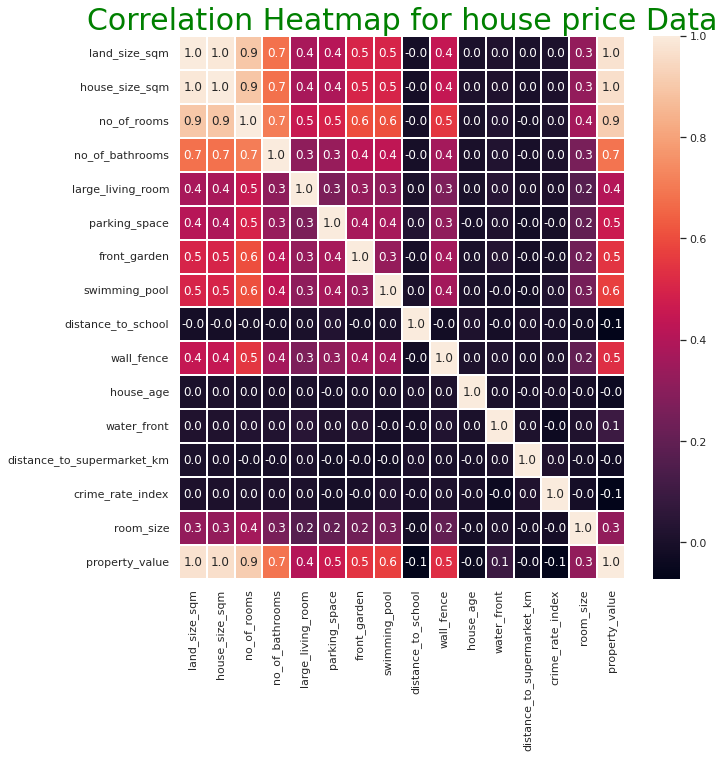

In [80]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_r.corr(method='pearson'), annot=True, linewidths=.1,fmt= '.1f')
plt.title("Correlation Heatmap for house price Data", color = 'green', fontsize = 30)
plt.show()


[0, 1, 2, 3]
[517, 1460, 1779, 1198]


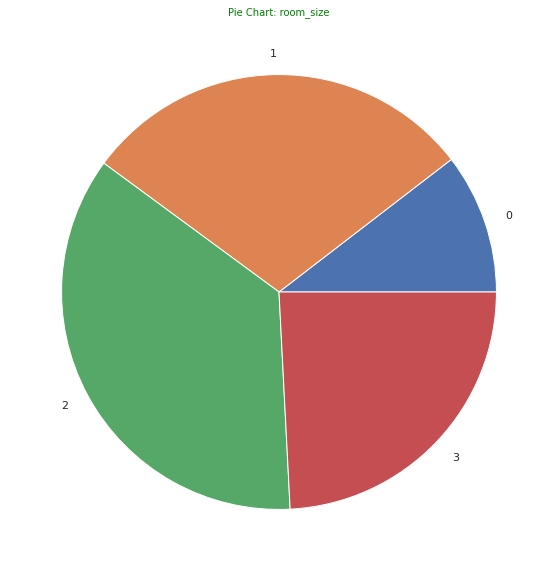

In [135]:
# Plot number of records in the dataset for different room_size

roomsizeList = []
roomsizeCount = []
for condition_name, subset in df_c.groupby('room_size'):
    roomsizeList.append(condition_name)
    roomsizeCount.append(len(subset))
print(roomsizeList)
print(roomsizeCount)

plt.figure(figsize = (10, 10))
plt.pie(roomsizeCount, labels = roomsizeList)
plt.title("Pie Chart: room_size", color = 'green', fontsize = 10)
plt.show()

<Axes: xlabel='distance_to_school', ylabel='count'>

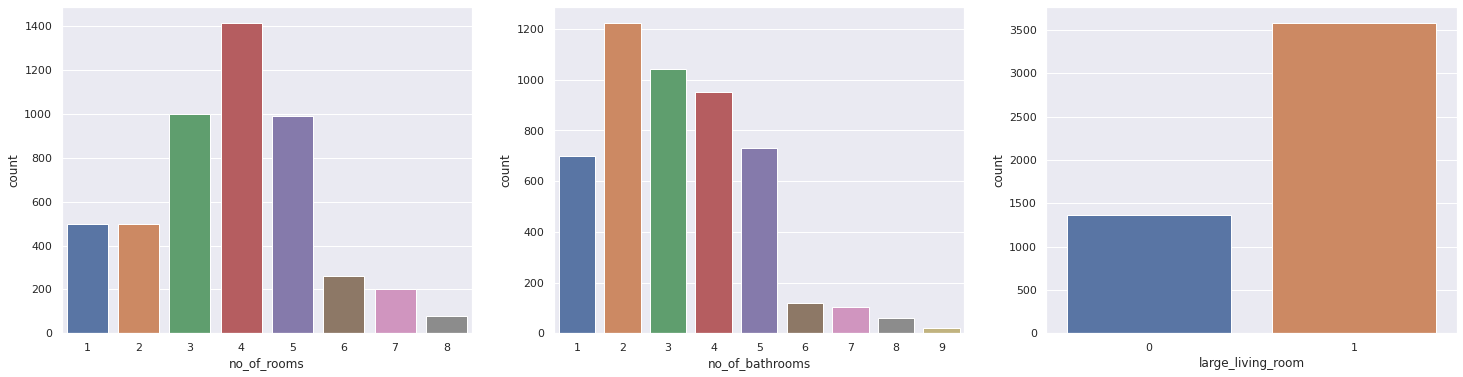

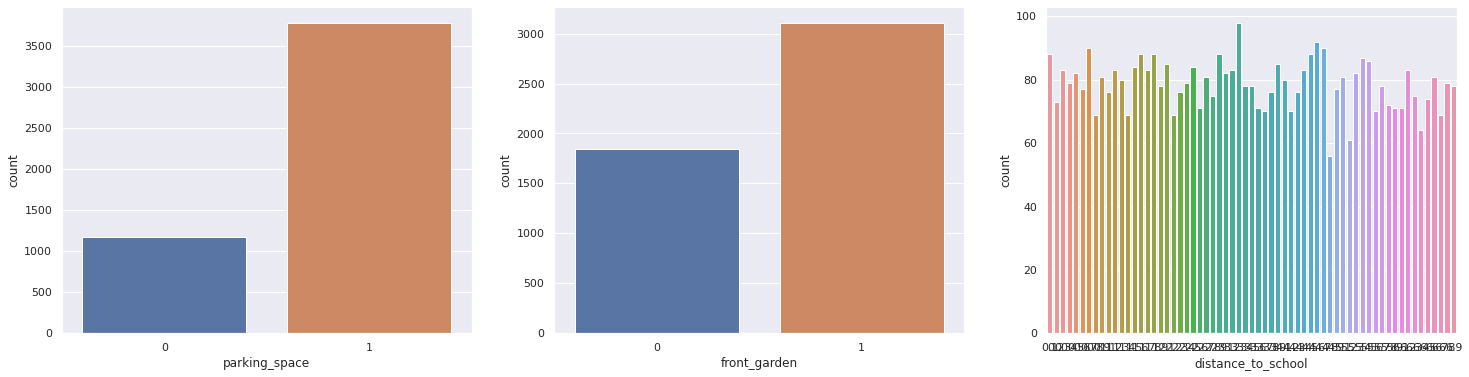

In [136]:
# Plot number of records in the dataset for different no_of_rooms, no_of_bathrooms, large_living_room, parking_space, front_garden, distance_to_school

f, axes = plt.subplots(1, 3,figsize=(25,6))
sns.countplot(x= "no_of_rooms", data=df_c, orient='v', ax=axes[0])
sns.countplot(x= "no_of_bathrooms", data=df_c , orient='v', ax=axes[1])
sns.countplot(x= "large_living_room", data=df_c , orient='v', ax=axes[2])

f, axes = plt.subplots(1, 3,figsize=(25,6))
sns.countplot(x= "parking_space", data=df_c , orient='v', ax=axes[0])
sns.countplot(x= "front_garden", data=df_c , orient='v', ax=axes[1])
sns.countplot(x= "distance_to_school", data=df_c , orient='v', ax=axes[2])

### Observation:
1.The pie chart and count plot are visualizations used to compare different parts of a dataset to the whole. These types of plots help to provide a clear picture of the distribution of different types of data in a dataset, which can be useful for making informed decisions.

2.From the pie-chart we can observe that people buy more room size 3 type house.

Text(0.5, 1.0, 'Line Plot: property value Vs. land size sqm')

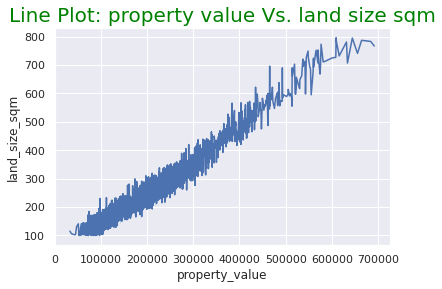

In [137]:
# Plot the  property value  based on Land Size

sns.set_theme(style="darkgrid")
sns.lineplot(x="property_value", y="land_size_sqm", data=df_c )
plt.title("Line Plot: property value Vs. land size sqm", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Linear Regression Plot: property value Vs. distance to school')

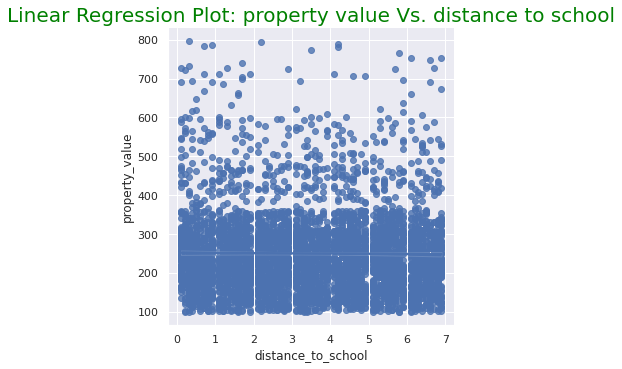

In [83]:
# Plot linear regression on property_value based on distance to school

g = sns.lmplot(data=df_r, x="distance_to_school", y="land_size_sqm")
g.set_axis_labels("distance_to_school", "property_value")
plt.title("Linear Regression Plot: property value Vs. distance to school", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Linear Regression Plot:  house_size_sqm Vs. no_of_rooms')

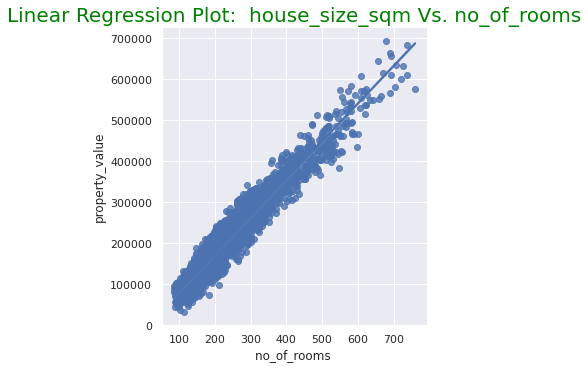

In [84]:
# Plot linear regression on house_size_sqm based on no_of_rooms

g = sns.lmplot(data=df_r, x="house_size_sqm", y="property_value")
g.set_axis_labels("no_of_rooms ", "property_value")
plt.title("Linear Regression Plot:  house_size_sqm Vs. no_of_rooms", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: house_size_sqm Vs. land_size_sqm (w.r.t no_of_rooms)')

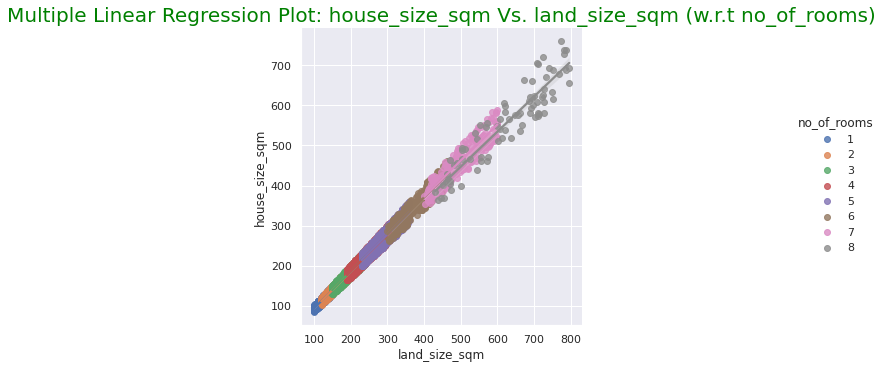

In [88]:
# Plot multiple linear regression on land_size_sqm based on size varying no_of_rooms

g = sns.lmplot(data=df_r, x="land_size_sqm", y="house_size_sqm", hue="no_of_rooms")
g.set_axis_labels("land_size_sqm", "house_size_sqm")
plt.title("Multiple Linear Regression Plot: house_size_sqm Vs. land_size_sqm (w.r.t no_of_rooms)", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: land_size_sqm Vs. house_size_sqm (w.r.t swimming_pool)')

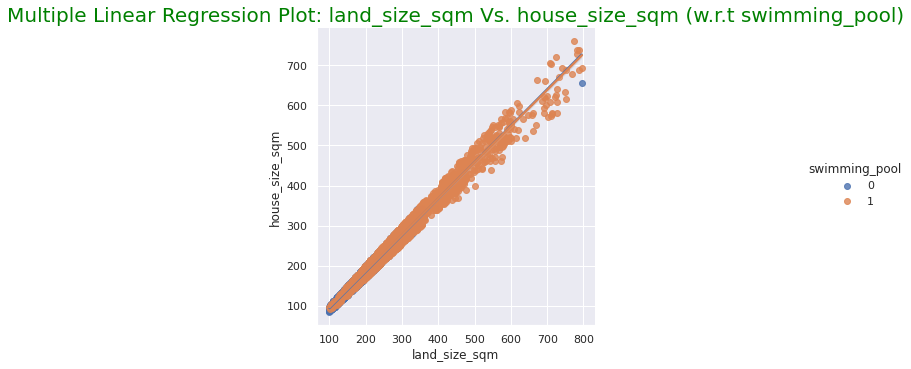

In [138]:
# Plot multiple linear regression on land_size_sqm based on size varying swimming_pool

g = sns.lmplot(data=df_c, x="land_size_sqm", y="house_size_sqm", hue="swimming_pool")
g.set_axis_labels("land_size_sqm", "house_size_sqm")
plt.title("Multiple Linear Regression Plot: land_size_sqm Vs. house_size_sqm (w.r.t swimming_pool)", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: land_size_sqm Vs. house_size_sqm (w.r.t front_garden)')

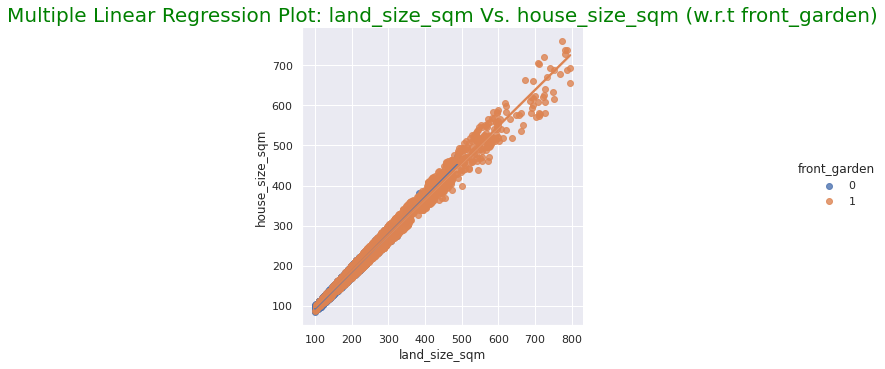

In [139]:
# Plot multiple linear regression on land_size_sqm based on size varying front_garden

g = sns.lmplot(data=df_c, x="land_size_sqm", y="house_size_sqm", hue="front_garden")
g.set_axis_labels("land_size_sqm", "house_size_sqm")
plt.title("Multiple Linear Regression Plot: land_size_sqm Vs. house_size_sqm (w.r.t front_garden)", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Box Plot: house_size_sqm Vs. no_of_rooms')

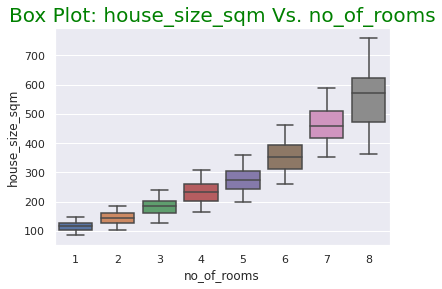

In [140]:
# Plot no_of_rooms on different house_size_sqm

sns.boxplot(x='no_of_rooms', y='house_size_sqm', data=df_c)
plt.title("Box Plot: house_size_sqm Vs. no_of_rooms", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Box Plot: no_of_bathrooms Vs. land_size_sqm')

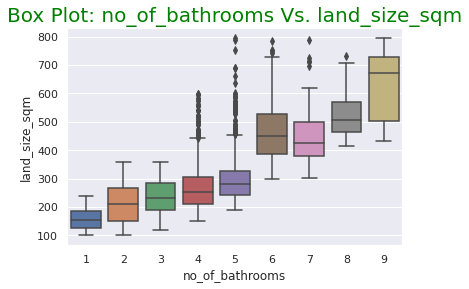

In [141]:
# Plot no_of_bathrooms on varying land_size_sqm

sns.boxplot(x='no_of_bathrooms', y='land_size_sqm', data=df_c)
plt.title("Box Plot: no_of_bathrooms Vs. land_size_sqm", color = 'green', fontsize = 20)

## II.II. Introduction of Classification Data

The dataset consists of information about a person's income, with 14 different attributes.

Attribute Information: 0. age (int64)
            
 1   workclass          object
 2   fnlwgt             int64 
 3   education          object
 4   educational-num    int64 
 5   marital-status    object
 6   occupation        object
 7   relationship      object
 8   race              object
 9   gender            object
 10  capital-gain      int64 
 11  capital-loss      int64 
 12  hours-per-week    int64 
 13  native-country    object
 14  income 


## II.II.I. Reading the data

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_a = pd.read_csv("/content/adult-2.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

# displaying all the columns data of top 10 rows in the jupyter notebook
pd.set_option('display.max_columns', 28)
df_a.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## II.II.II. Preprocessing of the data


In [146]:
# get the metadata; getting familiarized with columns and data-types
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Since there are no null values in any column of the dataset, there is no need to perform any data pre-processing.

In [147]:
# checking columns with null values
df_a.isna().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

It can be observed that there are hyphens (-) present in some of the column names in the dataset. Therefore, it is necessary to clean up these column names by removing the hyphens.

In [149]:
# clean up column names that have '-' in the dataframe

cols = df_a.columns
new_column_names = []

for col in cols:
    new_col = col.lstrip().rstrip().replace ("-", "_")
    new_column_names.append(new_col)

df_a.columns = new_column_names

df_a.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

The next step involves examining the distinct values present in the target column (income) and substituting them with more descriptive names (such as Low-income and High-income)

In [151]:
df_a.loc[df_a['income'] == '<=50K', 'income'] = 'Low-income'
df_a.loc[df_a['income'] == '>50K', 'income'] = 'High-income'

df_a.income.unique()

array(['Low-income', 'High-income'], dtype=object)

This dataset does not contain any null values in its columns, therefore no data preprocessing is required.

## **II.II.III. Visualization of the data**

### II.II.III.I. Correlation Heatmap


A correlation heatmap has been provided below. Based on the heatmap, the following observations can be made:





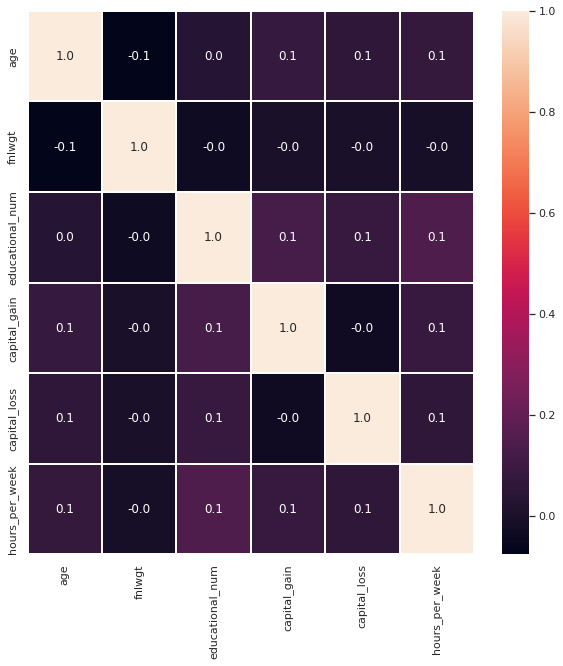

In [152]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_a.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

In [155]:
eduList = []
eduCount = []
for edu_name, subset in df_a.groupby('education'):
    eduList.append(edu_name)
    eduCount.append(len(subset))
print(eduList)
print(eduCount)

workclassList = []
workclassCount = []
for class_name, subset in df_a.groupby('workclass'):
    workclassList.append(class_name)
    workclassCount.append(len(subset))
print(workclassList)
print(workclassCount)

maritalList = []
maritalCount = []
for marital_name, subset in df_a.groupby('marital_status'):
    maritalList.append(marital_name)
    maritalCount.append(len(subset))
print(maritalList)
print(maritalCount)

occupationList = []
occupationCount = []
for occupation_name, subset in df_a.groupby('occupation'):
    occupationList.append(occupation_name)
    occupationCount.append(len(subset))
print(occupationList)
print(occupationCount)

relationshipList = []
relationshipCount = []
for relationship_name, subset in df_a.groupby('relationship'):
    relationshipList.append(relationship_name)
    relationshipCount.append(len(subset))
print(relationshipList)
print(relationshipCount)

raceList = []
raceCount = []
for race_name, subset in df_a.groupby('race'):
    raceList.append(race_name)
    raceCount.append(len(subset))
print(raceList)
print(raceCount)

genderList = []
genderCount = []
for gender_name, subset in df_a.groupby('gender'):
    genderList.append(gender_name)
    genderCount.append(len(subset))
print(genderList)
print(genderCount)

countryList = []
countryCount = []
for country_name, subset in df_a.groupby('native_country'):
    countryList.append(country_name)
    countryCount.append(len(subset))
print(countryList)
print(countryCount)

incomeList = []
incomeCount = []
for income_name, subset in df_a.groupby('income'):
    incomeList.append(income_name)
    incomeCount.append(len(subset))
print(incomeList)
print(incomeCount)


['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
[1389, 1812, 657, 247, 509, 955, 756, 1601, 2061, 8025, 594, 15784, 2657, 83, 834, 10878]
['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
[2799, 1432, 3136, 10, 33906, 1695, 3862, 1981, 21]
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
[6633, 37, 22379, 628, 16117, 1530, 1518]
['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
[2809, 5611, 15, 6112, 6086, 1490, 2072, 3022, 4923, 242, 6172, 983, 5504, 1446, 2355]
['Husband', 'Not-in-family', 'Other-relative',

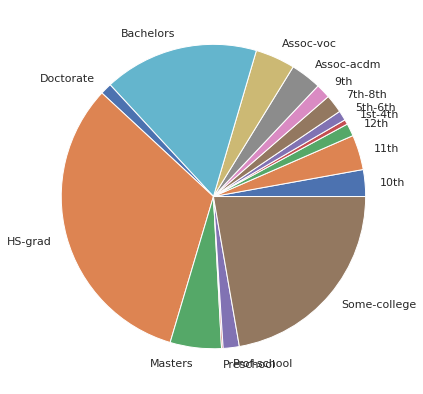

In [156]:
plt.figure(figsize = (7, 7))
plt.pie(eduCount, labels = eduList)
plt.show()

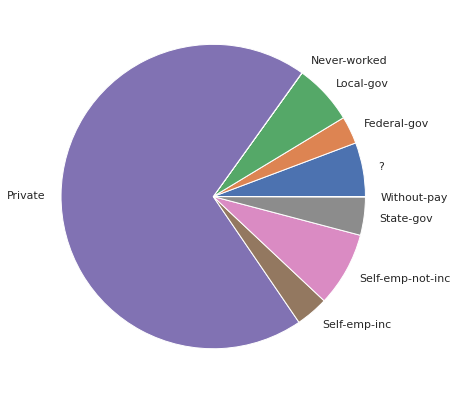

In [157]:
plt.figure(figsize = (7, 7))
plt.pie(workclassCount, labels = workclassList)
plt.show()

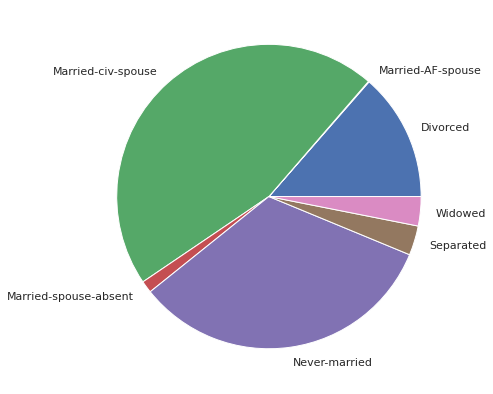

In [158]:
plt.figure(figsize = (7, 7))
plt.pie(maritalCount, labels = maritalList)
plt.show()

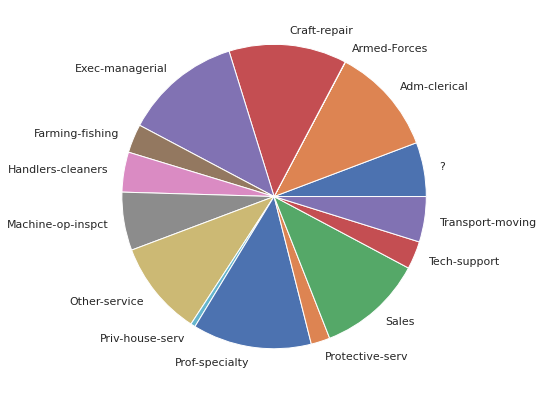

In [159]:
plt.figure(figsize = (7, 7))
plt.pie(occupationCount, labels = occupationList)
plt.show()

### Observation:

1. Pie charts are used to compare different attributes in a dataset to the whole. They can help to visualize which types of data are more prevalent and how they may impact decision making.
2. Based on the pie chart, we can see that the largest group of employees in this dataset is:
Male
White
Husband
Married-civ-spouse
HS-grad education level.

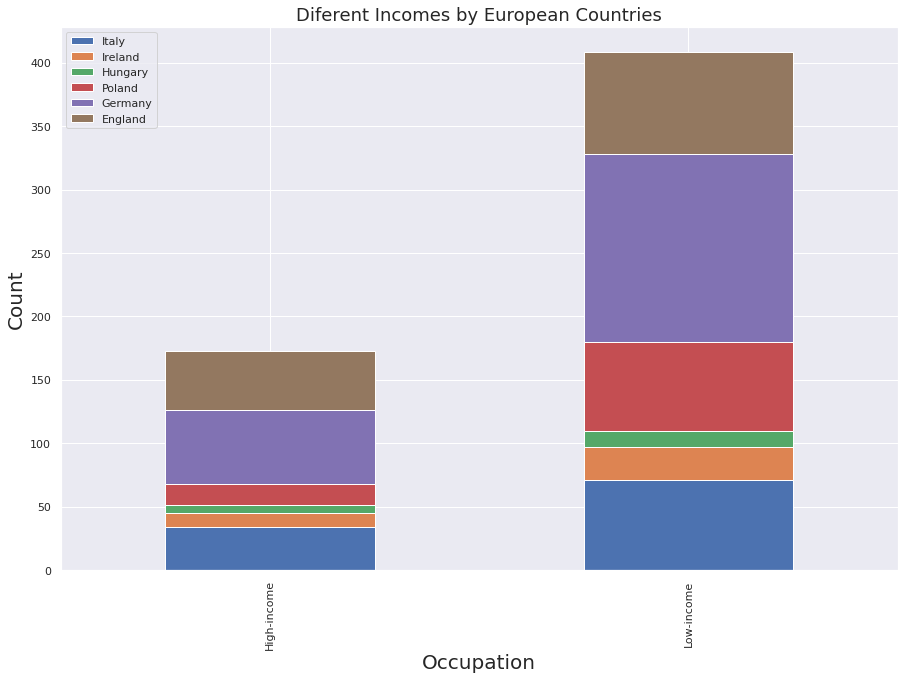

In [161]:
it = df_a[df_a.native_country == 'Italy']['income'].value_counts(sort=False)
ir = df_a[df_a.native_country == 'Ireland']['income'].value_counts(sort=False)
h = df_a[df_a.native_country == 'Hungary']['income'].value_counts(sort=False)
po = df_a[df_a.native_country == 'Poland']['income'].value_counts(sort=False)
g = df_a[df_a.native_country == 'Germany']['income'].value_counts(sort=False)
e = df_a[df_a.native_country == 'England']['income'].value_counts(sort=False)

pd.DataFrame({'Italy': it, 'Ireland': ir, 'Hungary': h, 'Poland': po, 'Germany': g, 'England': e}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by European Countries", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

### Observation:

1. The majority of the jobs are held by people of White and Black races.
2. The job roles of Adm-clerical and Priv-house-serv have more female employees.
3. There is an equal distribution of employees in the Other-service job category.

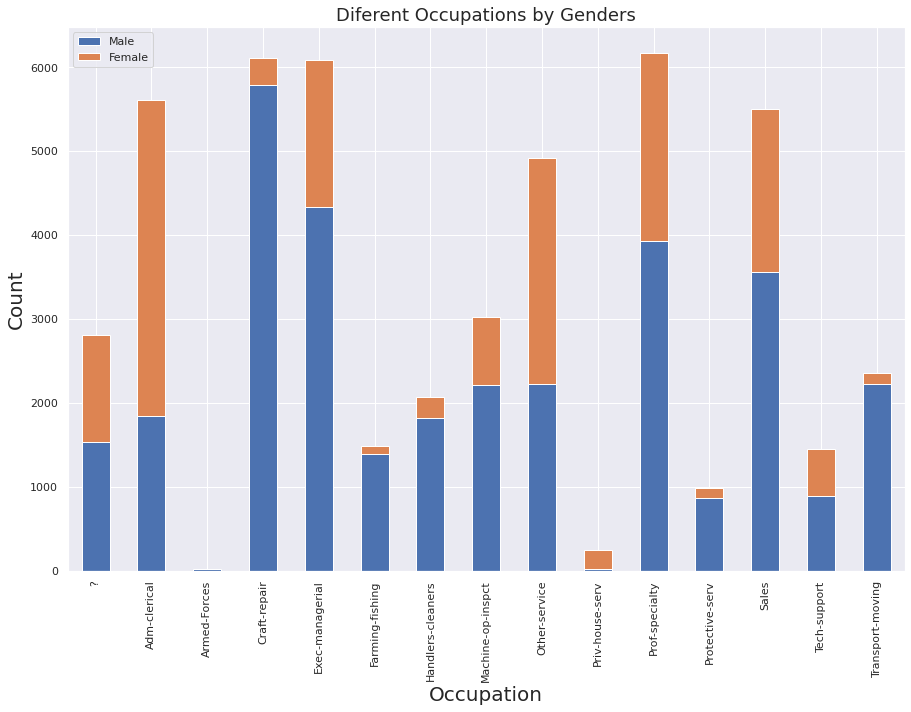

In [164]:
m = df_a[df_a.gender == 'Male']['occupation'].value_counts(sort=False)
w = df_a[df_a.gender == 'Female']['occupation'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Occupations by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

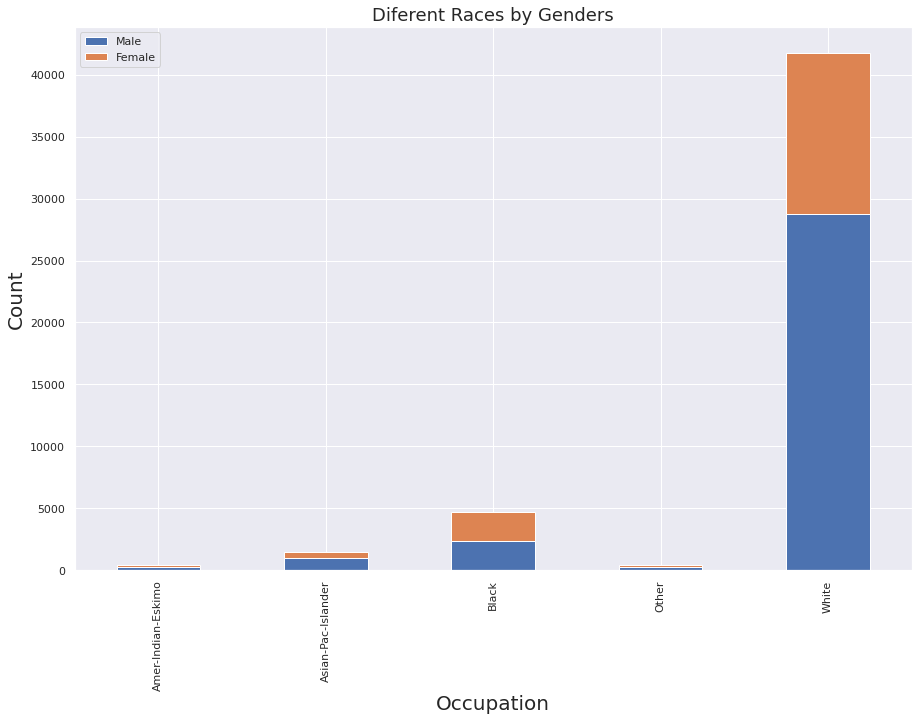

In [165]:
m = df_a[df_a.gender == 'Male']['race'].value_counts(sort=False)
w = df_a[df_a.gender == 'Female']['race'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Races by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

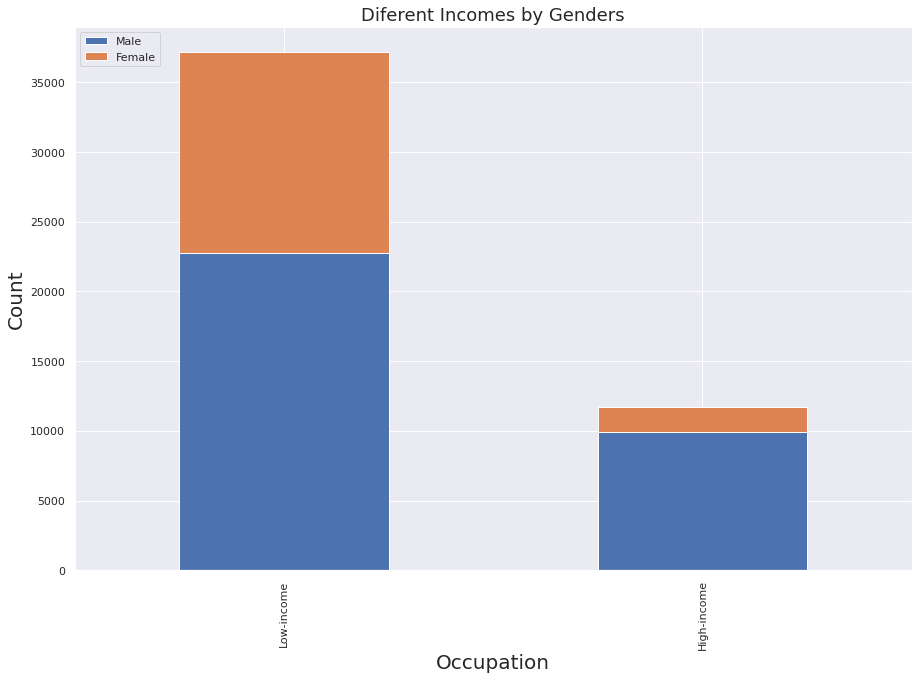

In [166]:
m = df_a[df_a.gender == 'Male']['income'].value_counts(sort=False)
w = df_a[df_a.gender == 'Female']['income'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

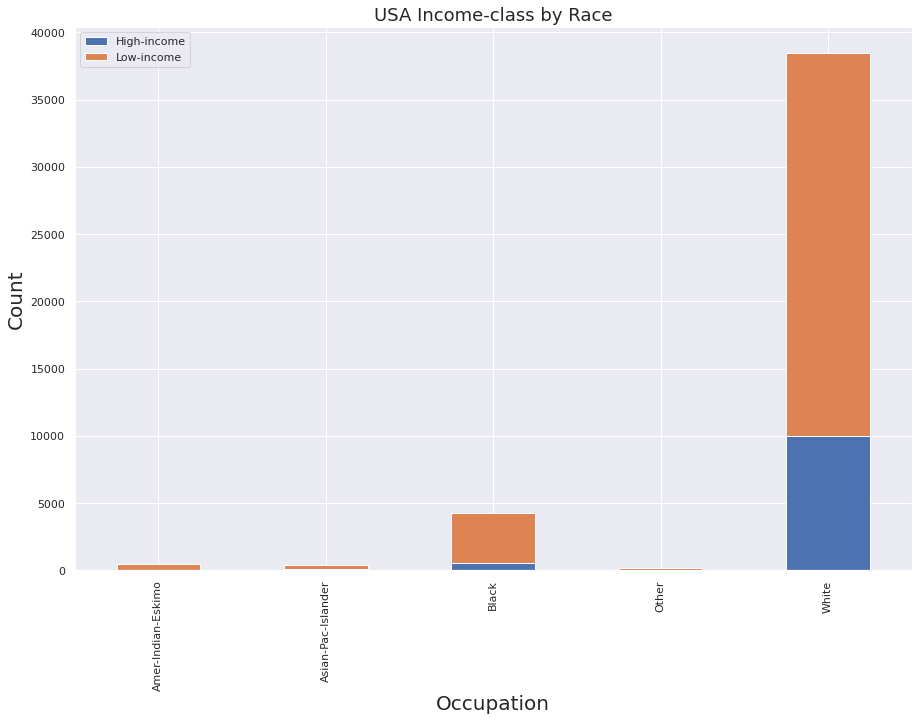

In [168]:
h = df_a[(df_a.income == 'High-income') & (df_a['native_country'] == 'United-States')]['race'].value_counts(sort=False)
l = df_a[(df_a.income == 'Low-income') & (df_a['native_country'] == 'United-States')]['race'].value_counts(sort=False)
pd.DataFrame({'High-income': h, 'Low-income': l}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("USA Income-class by Race", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

## Observation:

1. A small proportion of female employees earn high income.
2. High-income jobs in the USA are held by a higher proportion of people from the white race.



### II.II.IV. Preliminary observation

We have made several observations based on the different plots above. To summarize, we noticed discrimination based on gender and race in the job market. It also appears that there are more job opportunities available for individuals with a medium level of education (i.e. high-school graduates). Additionally, it is not clear which specific type of job is the most popular or in-demand in comparison to society.

### II.II.V. Preprocessing for Classification

o prepare the dataset for classification algorithms, I performed additional data processing to convert the textual data into numerical data. This is necessary for the algorithms that I applied and will explain later in the analysis.

In [169]:
encoding_dict = {"workclass": {'State-gov':1, 'Self-emp-not-inc':2, 'Private':3, 'Federal-gov':4,
                               'Local-gov':5, '?':6, 'Self-emp-inc':7, 'Without-pay':8, 'Never-worked':9},
                 "education": {'Bachelors':1, 'HS-grad':2, '11th':3, 'Masters':4, '9th':5, 'Some-college':6,
                               'Assoc-acdm':7, 'Assoc-voc':8, '7th-8th':9, 'Doctorate':10, 'Prof-school':11,
                               '5th-6th':12, '10th':13, '1st-4th':14, 'Preschool':15, '12th':16},
                 "marital_status": {'Never-married':1, 'Married-civ-spouse':2, 'Divorced':3,
                                    'Married-spouse-absent':4, 'Separated':5, 'Married-AF-spouse':6, 'Widowed':7},
                 "occupation": {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
                                'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
                                'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
                                'Tech-support':11, '?':12, 'Protective-serv':13, 'Armed-Forces':14,
                                'Priv-house-serv':15},
                 "relationship": {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':5,
                                  'Other-relative':6},
                 "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5},
                 "sex": {'Male':-1, 'Female':1},
                 "native_country": {'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, '?':5, 'Mexico':6,
                                    'South':7, 'Puerto-Rico':8, 'Honduras':9, 'England':10, 'Canada':11,
                                    'Germany':12, 'Iran':13, 'Philippines':14, 'Italy':15, 'Poland':16,
                                    'Columbia':17, 'Cambodia':18, 'Thailand':19, 'Ecuador':20, 'Laos':21,
                                    'Taiwan':22, 'Haiti':23, 'Portugal':24, 'Dominican-Republic':25,
                                    'El-Salvador':26, 'France':27, 'Guatemala':28, 'China':29, 'Japan':30,
                                    'Yugoslavia':31, 'Peru':32, 'Outlying-US(Guam-USVI-etc)':33, 'Scotland':34,
                                    'Trinadad&Tobago':35, 'Greece':36, 'Nicaragua':37, 'Vietnam':38, 'Hong':39,
                                    'Ireland':40, 'Hungary':41, 'Holand-Netherlands':42},
                 "income": {'Low-income':-1, 'High-income':1},
                }

df_c.replace(encoding_dict, inplace = True)

# observe pairwise correlation of columns using library function
df_c.corr()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size,property_value
land_size_sqm,1.000000,0.991371,0.898252,0.679780,0.371985,0.411108,0.501055,0.497159,-0.011094,0.443698,0.006547,0.018665,0.004692,0.007752,0.322612,0.973662
house_size_sqm,0.991371,1.000000,0.894753,0.677722,0.372900,0.384615,0.500914,0.500106,-0.010658,0.445266,0.008198,0.018977,0.001966,0.008044,0.322504,0.964163
no_of_rooms,0.898252,0.894753,1.000000,0.710043,0.452951,0.493262,0.603783,0.606602,-0.006162,0.547999,0.003455,0.026654,-0.007287,0.014644,0.363811,0.912155
no_of_bathrooms,0.679780,0.677722,0.710043,1.000000,0.310658,0.330699,0.419505,0.431550,-0.008322,0.365661,0.000966,0.021575,-0.002535,0.010655,0.258000,0.686525
large_living_room,0.371985,0.372900,0.452951,0.310658,1.000000,0.264601,0.329218,0.311235,0.003458,0.269745,0.003789,0.043128,0.008190,0.010799,0.167024,0.404843
parking_space,0.411108,0.384615,0.493262,0.330699,0.264601,1.000000,0.368903,0.371334,0.025226,0.314644,-0.001848,0.017491,-0.016110,-0.007465,0.202987,0.459860
front_garden,0.501055,0.500914,0.603783,0.419505,0.329218,0.368903,1.000000,0.327034,-0.008106,0.362512,0.005548,0.028637,-0.012637,-0.009018,0.235309,0.543363
swimming_pool,0.497159,0.500106,0.606602,0.431550,0.311235,0.371334,0.327034,1.000000,0.003723,0.361410,0.004264,-0.005525,-0.018826,0.020902,0.250068,0.569673
distance_to_school,-0.011094,-0.010658,-0.006162,-0.008322,0.003458,0.025226,-0.008106,0.003723,1.000000,-0.021986,0.011519,-0.013448,0.010095,-0.002084,-0.015233,-0.072357
wall_fence,0.443698,0.445266,0.547999,0.365661,0.269745,0.314644,0.362512,0.361410,-0.021986,1.000000,0.011068,0.023470,0.001915,0.014697,0.199975,0.530090


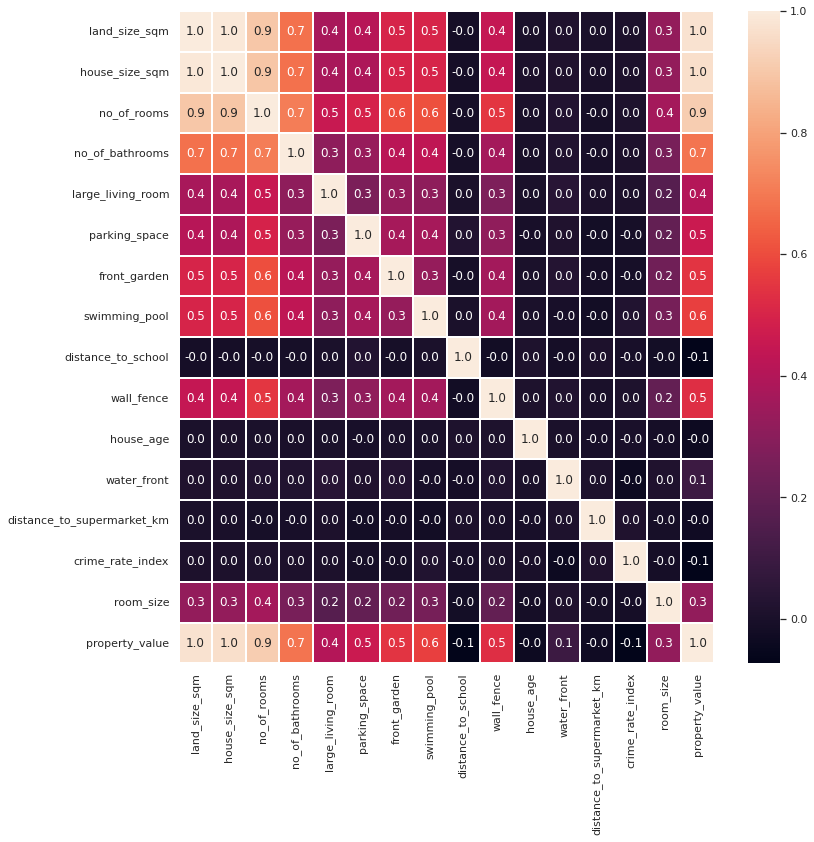

In [171]:
f = plt.subplots(figsize=(12, 12))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# III. Methods

## III.A 5-fold Cross Validation

- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. 

## III.B Nonlinear Regression 

- Summarize the nonlinear regression model. 
- Use the NeuralNet class for regression to apply to your data. 
- Explain your codes (not in comment). 


## III.C Nonlinear Logistic Regression

- Summarize the nonlinear logistic regression model. 
- Finish the following NeuralNetLogReg class.
- Check if your codes works well with toy synthetic data. 
- Apply to your classification data. 
- Explain your codes (not in comment). 

## III.A 5-fold Cross Validation
The goal is to find good parameters, including the structure of a neural network, using 5-fold cross validation and report the cross validation accuracies. Cross validation is a technique used to evaluate model performance and detect problems caused by overfitting and resampling. In this assignment, cross validation is used to find the best number of hidden layer units. Although cross validation can be used for various purposes, it increases data processing load and time. the process of k-fold cross validation, which involves randomly dividing the dataset into k-groups of equal size, using one group as the validation set in each step, and calculating the accuracy.


In this assignment, I used a neural network model with one hidden layer, and the best number of hidden units in this layer was determined using k-fold cross validation. The model structure is illustrated , which shows the input layer, hidden layer, and output layer.

To perform k-fold cross validation, I first split the entire dataset into two parts: the training dataset and the test dataset. Then, I split the training dataset into equal-sized folds. In each iteration, I used k-1 folds for training and the remaining fold for validation. By iterating through the folds, I obtained the best parameter (in this case, the number of hidden units in the hidden layer) by training and validating the model on the training folds.

## III.I.I 5-fold Cross Validation: Explanation of Codes

I created a class called AlgoCVWrapper which has two methods: init and run. The init method initializes all the attributes of the class, while the train_test_split method splits the dataset into a train set and a test set, with the option to set the training data ratio (default is 0.8). The cross_validation_split method splits the training data into K-folds, where the number of folds is also an option to set (default is 5). The run method is an abstract method, which will be implemented by any class that extends AlgoCVWrapper. In the run method, the K-folded data will be used for training and validating the neural network models.

In [172]:
from random import seed
from random import randrange
from abc import ABC, abstractmethod
from copy import deepcopy as copy

class AlgoCVWrapper:
    """
        Abstract class for doing experiment through Cross Validation
        
        Attributes
        ==========
        Xtrain            List of all the training feature data
        Ttrain            List of all the training target data
        Xtest             List of test feature data
        Ttest             List of test target data
        Xtrain_split      List of splitted training feature data
        Ttrain_split      List of splitted training target data
    """

    def __init__(self):
        """
            initialized all the attributes as None
        """
        seed(1)
        self.Xtrain = None
        self.Ttrain = None
        self.Xtest = None
        self.Ttest = None
        self.Xtrain_split = None
        self.Ttrain_split = None

    # Split a dataset into a train and test set
    def train_test_split(self, Xdataset, Tdataset, split=0.90):
        self.Xtrain = list()
        self.Ttrain = list()
        train_size = split * len(Xdataset)
        print("train size: {}, test size: {}".format(train_size, len(Xdataset)-train_size))
        self.Xtest = Xdataset
        self.Ttest = Tdataset
        while len(self.Xtrain) < train_size:
            index = randrange(len(self.Xtest))
            self.Xtrain.append(self.Xtest.pop(index))
            self.Ttrain.append(self.Ttest.pop(index))
    
    # Split a dataset into k folds
    def cross_validation_split(self, Xdataset, Tdataset, folds=5):
        self.train_test_split(Xdataset, Tdataset)
        
        self.Xtrain_split = list()
        self.Ttrain_split = list()
        
        tmp_Xtrain = copy(self.Xtrain)
        tmp_Ttrain = copy(self.Ttrain)

        fold_size = int(len(tmp_Xtrain) / folds)
        print("fold size: {}".format(fold_size))
        for i in range(folds):
            Xfold = list()
            Tfold = list()
            while len(Xfold) < fold_size:
                index = randrange(len(tmp_Xtrain))
                Xfold.append(tmp_Xtrain.pop(index))
                Tfold.append(tmp_Ttrain.pop(index))
            self.Xtrain_split.append(Xfold)
            self.Ttrain_split.append(Tfold)

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def run(self, X, T, layers, folds=5):
        """
            run neural network algorithm
            
            parameters
            -----------
            X         List of input data
            T         List of target labels
            layers    layers of Neural Network
        """        
        pass

## III.II Nonlinear Regression

n the previous programming assignment, we explored linear regression models that use a straight line to relate two variables. However, in nonlinear regression, we can fit curves to the data. This means that the data are modeled by a function that is a nonlinear combination of the model parameters and depends on one or more independent variables. The aim is to minimize the Root Mean Square Error (RMSE) as much as possible. Nonlinear regression is more suitable when there is no linear relationship among data features, and a more complex curve is needed to predict the data.

## III.II.I Nonlinear Regression: Explanation of Codes

The provided NeuralNet class was utilized for solving the nonlinear regression problem. The model has several parameters, attributes, and methods that were used in the implementation. The parameters include nunits, which represents the number of units in each layer, and rho, which is a learning rate that is proportional to the number of hidden unit layers. The attributes of the model include _nLayers, which is the number of hidden unit layers, _W, which represents the weights, _weights, which is the weights in one dimension, and stdX and stdT, which are standardization classes for the data and target respectively.

The model has several methods that were used in the implementation, including set_hunit, which is used to update/initiate weights, pack, which horizontally packs multiple weights of each layer into one vector, forward, which does the forward processing of the neural network, backward, which does the back-propagation of the neural network, train, which is used to train the neural network, and use, which is used to apply the trained network for doing prediction on the test data. The train method involves standardizing the input features and target sets and then optimizing through gradient update.

## III.II.II Nonlinear Regression: Feature Selection and Data Preparation



In [39]:
# randomly pick 20K data
data_r = df_r.sample(20000,replace=True)

In [173]:
# constants

# list of significant features
sig_features = ['distance_to_school', 'no_of_rooms', 'no_of_bathrooms', 'swimming_pool', 'front_garden']

# list of target features
target_features = ['land_size_sqm']

In [174]:
X = data_r[sig_features].copy()
X.shape

(20000, 5)

In [175]:
T = data_r[target_features].copy()
T = T.values.reshape(T.shape[0],1)
T.shape

(20000, 1)

In [195]:
pip install autograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [196]:
pip install nn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
import nn
import autograd.numpy as np   

%reload_ext autoreload
%autoreload 2

nlr = nn.NeuralNet([6, 64, 1])
nlr.train(X, T)
Y = nlr.use(X)

AttributeError: ignored

In [200]:
from pip._internal.cli.req_command import RequirementCommand, with_cleanup
from pip._internal.cli.status_codes import SUCCESS
from pip._internal.operations.build.build_tracker import get_build_tracker
from pip._internal.req.req_install import (
    LegacySetupPyOptionsCheckMode,
    check_legacy_setup_py_options,
)
from pip._internal.req.req_install import check_legacy_setup_py_options
from pip._internal.utils.misc import ensure_dir, normalize_path, write_output
from pip._internal.utils.temp_dir import TempDirectory

        
        reqs = self.get_requirements(args, options, finder, session)
        check_legacy_setup_py_options(
            options, reqs, LegacySetupPyOptionsCheckMode.DOWNLOAD
        )
        check_legacy_setup_py_options(options, reqs)

        preparer = self.make_requirement_preparer(
            temp_build_dir=directory

IndentationError: ignored

In [205]:
from nn import NeuralNet
from tensorflow.keras.models import NeuralNet


class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        pass

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        pass

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        pass

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        pass

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        pass


ImportError: ignored

# III.II.III Nonlinear Regression: Apply Cross Validation

As part of this assignment, I delved deeper into the NeuralNet model for regression analysis on [1], utilizing cross-validation to determine the optimal number of hidden units from a set of choices . To accomplish this, I created a class called NeuralNetCVWrapper that extends the previously described AlgoCVWrapper class. The run method was the only method I implemented, which initially calls the cross_validation_split method to generate splits from the training set.

To evaluate the performance of the nonlinear regression model, we must divide the data into training and testing datasets. I designated 70% of the total data  for training and the remaining 30%  for testing. Next, I divided the training data into a list of lists (K-folded). Then, I utilized each fold as a test and returned the accuracies for each fold. Finally, I incorporated figures that display the Measured Vs. Predicted results to facilitate understanding the impacts of cross-validation. In my experiment, I used the tanh function for nonlinear regression, which utilizes logarithmic, trigonometric, exponential, and other fitting methods.

In [206]:

class NeuralNetCVWrapper(AlgoCVWrapper):
    """
    NeuralNetCVWrapper class
    """

    def __init__(self):
        super().__init__()

    def run(self, X, T, layers, folds=5):
        """
        Run NeuralNet model using cross-validation.
        :param X: input data matrix
        :param T: target values vector
        :param layers: list of layer sizes
        :param folds: number of CV folds (default 5)
        :return: list of test errors for each CV round
        """
        test_errors = []

        # Split data into folds
        AlgoCVWrapper.cross_validation_split(self, X, T)

        for i in range(folds):
            # Get training and validation data for this fold
            X_train_round, T_train_round, X_validate_round, T_validate_round = self.get_train_validate_data(i)

            # Measure accuracy for different layer sizes
            max_accuracy = 0
            best_param = None
            for neurons in layers:
                nlr = nn.NeuralNet([X_train_round.shape[1], neurons, 1])
                nlr.train(X_train_round, T_train_round)
                T_nlr = nlr.use(X_validate_round)
                accuracy = 100 - np.mean(np.abs(T_validate_round - T_nlr)) % 100

                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_param = neurons

            # Train model with best layer size on all training data
            nlr = nn.NeuralNet([X_train_round.shape[1], best_param, 1])
            nlr.train(self.Xtrain, self.Ttrain)

            # Evaluate model on test data
            T_nlr = nlr.use(self.Xtest)
            test_err = 100 - np.mean(np.abs(self.Ttest - T_nlr)) % 100
            test_errors.append([best_param, test_err])

            # Plot result for this fold
            fig, ax = plt.subplots()
            ax.scatter(self.Ttest, T_nlr, edgecolors=(0, 0, 0))
            ax.plot([min(self.Ttest), max(self.Ttest)], [T_nlr.min(), T_nlr.max()], 'k--', lw=4)
            ax.set_xlabel('Measured')
            ax.set_ylabel('Predicted')
            plt.show()

            print("{}-th iteration done! Error: {}".format((i + 1), test_errors))

        return test_errors

    def get_train_validate_data(self, i):
        """
        Get training and validation data for a given fold index.
        :param i: fold index
        :return: tuple of training and validation data
        """
        ids = list(range(self.n_folds))
        ids.pop(i)

        X_train_round = None
        T_train_round = None

        # Validation data in the current CV round
        X_validate_round = np.array(self.Xtrain_split)[i]
        T_validate_round = np.array(self.Ttrain_split)[i]

        # Stacking training data in the current CV round
        for j in ids:
            if j == ids[0]:
                X_train_round = np.array(self.Xtrain_split)[j]
                T_train_round = np.array(self.Ttrain_split)[j]
            else:
                 X_train_round = np.concatenate((X_train_round, np.array(self.Xtrain_split)[j]), axis=0)
                 T_train_round = np.concatenate((T_train_round, np.array(self.Ttrain_split)[j]), axis=0)


## III.II.IV Nonlinear Regression: Experimentation using CV

In this section, I described how I visually presented the results of the cross-validation process and computed the root-mean-square error (RMSE) and accuracy measures for the optimal model parameter found through cross-validation, using the entire training dataset.

## III.III Nonlinear Logistic Regression
In this assignment, we have learned about the nonlinear logistic regression model which extends the linear logistic regression for classification problems with multiple labels. The softmax function is used to generate the probability distribution for all classes. To update the weights of the model, we use the indicator target labels for training. We derived the update rule and represented it in matrix form for batch samples.


## III.III.I Nonlinear Logistic Regression: Explanation of Codes

The author has extended the existing NeuralNet model to integrate a neural network model for logistic regression. The new model, called NeuralNetLogReg, includes a new method called softmax, which is used during the forward pass of the logistic regression. Additionally, the author has updated the error function to use the log function and added a small value to avoid errors with log(0). The use method has also been updated to preprocess the test sets before applying the trained network to predict the data for the test set.

## III.III.II Nonlinear Logistic Regression: Sanity Check

To ensure that the NeuralNetLogReg class is working correctly, I conducted some experiments similar to Lee et al. I used the following datasets for the experiments:

1. Generated Small Data, which yielded an accuracy of 95%
2. Circles Data, which yielded an accuracy of 50%
3. Iris Data, which yielded an accuracy of 33%.

In [ ]:
# import the base NeuralNet class
from nn import NeuralNet

# define the new NeuralNetLogReg class, which extends the NeuralNet class
class NeuralNetLogReg(NeuralNet):
    
    # add a softmax method for use in the forward pass
    def softmax(self, z):
        # ensure that z is a numpy array
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        # calculate the exponential of z
        f = np.exp(z) 
        # divide each row by the sum of the rows, keeping dimensions consistent
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # initialize the class with the same parameters as NeuralNet
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    # define the forward pass for logistic regression, calling the softmax method
    def forward(self, X):
        t, z = NeuralNet.forward(self, X)
        return (self.softmax(t), z)

    # define the error function for logistic regression, using log to avoid errors
    def _objectf(self, T, Y, wpenalty):
        # set a small value to avoid log(0)
        epsilon = 1e-12
        # clip values to avoid undefined errors
        Y = np.clip(Y, epsilon, 1. - epsilon)
        # calculate the cross-entropy error
        N = Y.shape[0]
        ce = -np.sum(np.sum(T * np.log(Y+1e-9)))
        return ce

    # reuse the NeuralNet train method, converting T to an indicator matrix
    def train(self, X, T, **params):
        NeuralNet.train(self, X, self.make_indicator(T))

    # define the use method to make predictions on test data, returning both labels and probabilities
    def use(self, X):
        # standardize the input data if necessary
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        # calculate the class probabilities
        classes, prob = self.forward(Xs)
        # unstandardize the classes if necessary
        if self.stdT is not None:
            classes = self.stdT.unstandardize(classes)
        # return the predicted labels and probabilities
        return (np.argmax(classes, 1), prob, classes)


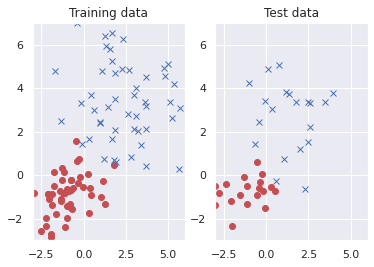

In [185]:
##Define variables for dataset generation
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

##Define mean and covariance for two classes
mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

##Generate training data
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[N1:, :] = 1 # labels are zero or one

##Normalize inputs
means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xtrains = (Xtrain - means) / stds

##Generate test data
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

##Normalize inputs
Xtests = (Xtest - means) / stds

##Plot datasets
plt.figure()
plt.subplot(121)
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')
plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("Training data")

plt.subplot(122)
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')
plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("Test data")

plt.show()

## III.III.II.II Experiment on Circles Data

X shape: (800, 2)
T shape: (800, 1)


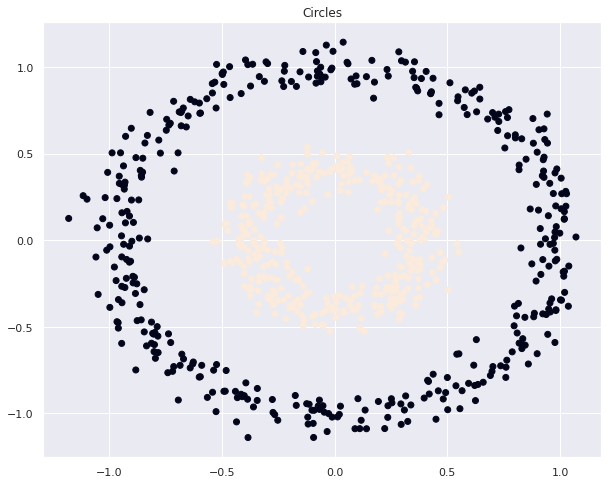

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

##Generate circles data
X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)

##Plot circles data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X[:, 0], X[:, 1], marker='o', c=T)
ax.set_title("Circles")

##Reshape T to have one column
T = np.reshape(T, (-1, 1))

##Print shapes of X and T
print(f"X shape: {X.shape}")
print(f"T shape: {T.shape}")





## III.III.II.III Experiment on Iris Data

In [187]:
from sklearn.datasets import load_iris

data = load_iris()

In [188]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [189]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [190]:
data.data.shape

(150, 4)

In [191]:
data.target = np.reshape(data.target, (150, 1))

## III.III.III Nonlinear Logistic Regression: Experiment with CV

In this section, I demonstrated how the results of cross validation can be visualized step by step and used to determine the best parameter for Nonlinear Logistic Regression, with accuracy as the metric. Additionally, I selected the age, education_num, capital_gain, capital_loss, and hours_per_week features out of all the available features to perform income classification based on my understanding and analysis of the feature selection discussed in class.

In [193]:
# randomly pick 20K data
data_a = df_a.sample(20000)

In [194]:
# list of classification features (educated guess)
classification_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# list of target features
target_classification_features = ['income']

# IV - Results

- Presents the results of comparison of the tested models with CV errors.
- Visualize the results 
- What do you think about the results? 

### IV.I Results: Visualization

## IV.II Parameter/network structure choice
In this section, I utilized the neural network architecture that was previously described. I employed cross validation to determine the optimal number of hidden units, which is a crucial factor for enhancing performance. Due to the extensive time it took to run cross validation, I decreased the number of features in the dataset. Feature selection was previously discussed in earlier sections.

I employed a single hidden layer and cross validation to determine the number of hidden units in the layer. There are other possibilities to explore, such as finding the optimal number of hidden layers. For both problems, I utilized a fixed number of iterations. However, altering this parameter could influence the model's overall performance and accuracy. However, it was not feasible to cover everything in a single assignment.

I chose the parameter that provided the lowest cross validation error to train the entire model, resulting in superior accuracy. I discovered that
resulted in better overall results for the regression problem using cross validation, while
hidden units provided superior performance in the classification problem. I gained a better understanding of the significance of cross validation in neural network parameter selection based on the experimental findings.

In comparison to classification, regression yielded the poorest results, possibly due to data correlation. I explored this aspect outside the scope of this assignment.

### IV.III Prediction Results
The plotted graphs clearly show that the performance of the non-linear regression and non-linear logistic regression models change with different cross validation folds. The plots after each iteration in cross validation demonstrate how the model learns and performs. After finding the best number of hidden units for the regression model, we observed changes in the predicted values.

The non-linear regression model attempts to learn feature weights through forward and backward passes. The classification task yielded better results compared to the regression task, which may be due to factors such as the data distribution, number of hidden layers, number of hidden units, and learning rate. These factors could be further explored in future work.

For the non-linear logistic regression model, I first tested it on toy data before proceeding to further experimentation. One significant observation from these experiments is that the output could be biased if the cross validation contains a majority of data from one class. To improve this, equal distribution of classes in each fold could be used. Interestingly, the classification task yielded overall better results due to the nature of the data, as discussed in section _.

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

Through the completion of this assignment, I have gained a thorough understanding of Neural Networks and have become confident in my ability to build them from scratch. The extensive experimentation on regression data [1] and classification data [2] has provided valuable insights into the importance of Neural Networks. Additionally, I have learned how to employ cross validation techniques to select the best features for Neural Networks.

This assignment was well-designed and required both theoretical and implementation knowledge. The key challenge was understanding the NeuralNet class, and I am grateful to Dr. Minwoo Jake Lee for his help in this area. There are multiple possible implementations of cross validation, but I was only able to explore one. It is not feasible to cover all aspects of this topic in a single assignment.

The assignment involved a significant amount of theoretical writing, which may appear simple but required a substantial amount of effort. In my opinion, it would be more beneficial to focus on implementation-related questions rather than adding more theoretical writing.

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 


# How to start?

* Download **a3.tgz** from Canvas.
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
